1. Data Manipulation

In [82]:
import pandas as pd

# a. Read the CSV file
data = '/content/data.csv'
df = pd.read_csv(data)

In [83]:

# b. Show the basic statistical description
basic_stats = df.describe()
print("Basic Statistical Description:")
print(basic_stats)

Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [84]:
# c. Check for null values
null_values = df.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [85]:
# d. Replace null values with mean
df.fillna(df.mean(), inplace=True)

In [86]:
# e. Aggregate data using min, max, count, mean for at least two columns
agg_columns = ['Duration', 'Calories']
aggregated_data = df[agg_columns].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:")
print(aggregated_data)


Aggregated Data:
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [87]:
# f. Filter rows with calories between 500 and 1000
filtered_df_1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df_1)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [88]:
# g. Filter rows with calories > 500 and pulse < 100
filtered_df_2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df_2)


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [89]:
# h. Create a new df_modified dataframe without "Maxpulse"
df_modified = df.drop(columns=['Maxpulse'])
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [90]:
# i. Delete "Maxpulse" column from the main df dataframe
df.drop(columns=['Maxpulse'], inplace=True)

In [92]:
# j. Convert the datatype of Calories column to int
df['Calories'] = df['Calories'].astype(int)

<Axes: title={'center': 'Scatter Plot: Duration vs Calories'}, xlabel='Duration', ylabel='Calories'>

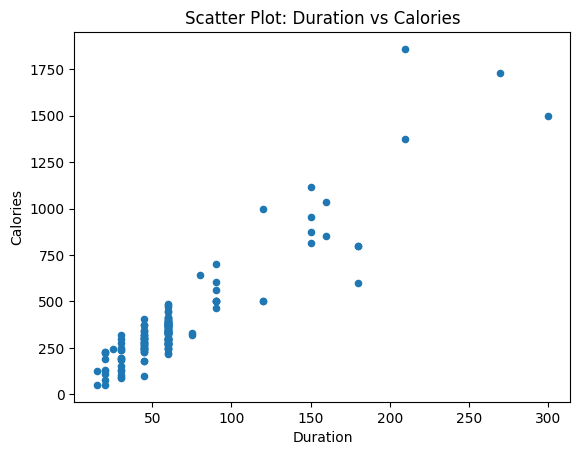

In [93]:
# k. Scatter plot for Duration and Calories
df.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')

2. Linear Regression

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [96]:
# a. Import the given "Salary_Data.csv"
salary_data = '/content/Salary_Data  .csv'
df = pd.read_csv(salary_data)

# Display the first few rows of the DataFrame
print("Dataset:")
print(df.head())

Dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [98]:
# b. Split the data into train and test partitions
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [99]:
# c. Train and predict the model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [100]:
# d. Calculate mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")


Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


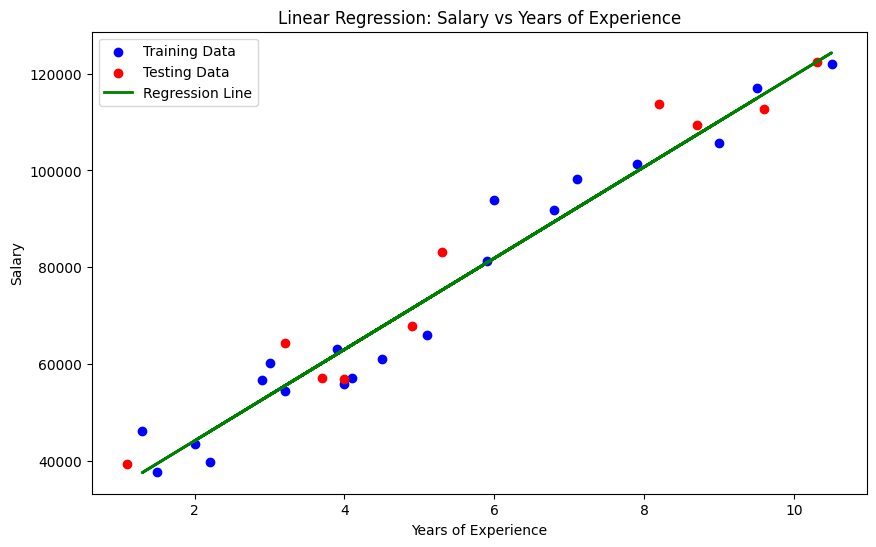

In [101]:
# e. Visualize train and test data using scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Plotting the regression line for training data
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.show()

Video link - https://colab.research.google.com/drive/1Ou-DLuNOGJ3zqVpFuil_FHp5lHxF4sPi?usp=drive_link